#01.SETUP

In [2]:
import os

In [3]:
cd /root/Share/LOTUSROOM/lotusroom_notebooks

/root/Share/LOTUSROOM/lotusroom_notebooks


In [4]:
!pip install transformers==4.25.1
!pip install bitsandbytes-cuda111==0.26.0
!pip install datasets==1.16.1
!pip install bitsandbytes loguru
!pip install accelerate
!pip install discord.py
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install transformers --upgrade
!pip install langdetect
!pip install scipy
!pip install tensorboard
!pip install ctranslate2 sentencepiece
!pip install -q diffusers transformers accelerate peft

  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2
ERROR: Could not find a version that satisfies the requirement bitsandbytes-cuda111==0.26.0 (from version

In [5]:
import os
from config._tokens import *
os.environ['TOKEN1'] = token1
os.environ['TOKEN2'] = token2
os.environ['TOKEN3'] = token3

#02.LOAD GPTs & SD

In [7]:
from gptj import config, tokenizer, GPTJForCausalLM
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
#gpt = GPTJForCausalLM.from_pretrained("./saved_models_gpt-j-6B-8bit/gpt-j-6B",low_cpu_mem_usage=True)
gpt = GPTJForCausalLM.from_pretrained("/root/Share/LOTUSROOM/mary-shelly", revision="float16", torch_dtype=torch.float32, low_cpu_mem_usage=True)
gpt.to(device)


/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


lm_head Linear(in_features=4096, out_features=50400, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, b

Some weights of the model checkpoint at /root/Share/LOTUSROOM/mary-shelly were not used when initializing GPTJForCausalLM: ['lm_head.adapter.0.weight', 'lm_head.adapter.1.weight', 'transformer.h.0.attn.k_proj.adapter.0.weight', 'transformer.h.0.attn.k_proj.adapter.1.weight', 'transformer.h.0.attn.out_proj.adapter.0.weight', 'transformer.h.0.attn.out_proj.adapter.1.weight', 'transformer.h.0.attn.q_proj.adapter.0.weight', 'transformer.h.0.attn.q_proj.adapter.1.weight', 'transformer.h.0.attn.v_proj.adapter.0.weight', 'transformer.h.0.attn.v_proj.adapter.1.weight', 'transformer.h.0.mlp.fc_in.adapter.0.weight', 'transformer.h.0.mlp.fc_in.adapter.1.weight', 'transformer.h.0.mlp.fc_out.adapter.0.weight', 'transformer.h.0.mlp.fc_out.adapter.1.weight', 'transformer.h.1.attn.k_proj.adapter.0.weight', 'transformer.h.1.attn.k_proj.adapter.1.weight', 'transformer.h.1.attn.out_proj.adapter.0.weight', 'transformer.h.1.attn.out_proj.adapter.1.weight', 'transformer.h.1.attn.q_proj.adapter.0.weight', 't

GPTJForCausalLM(
  (transformer): GPTJModel(
    (wte): FrozenBNBEmbedding(50400, 4096)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-27): 28 x GPTJBlock(
        (ln_1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (attn): GPTJAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (k_proj): FrozenBNBLinear(4096, 4096)
          (v_proj): FrozenBNBLinear(4096, 4096)
          (q_proj): FrozenBNBLinear(4096, 4096)
          (out_proj): FrozenBNBLinear(4096, 4096)
        )
        (mlp): GPTJMLP(
          (fc_in): FrozenBNBLinear(4096, 16384)
          (fc_out): FrozenBNBLinear(16384, 4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): FrozenBNBLinear(4096, 50400)
)

In [8]:
async def get_mary_response(prompt, min_words=128, max_words=128):
    global device, tokenizer, gpt
    prompt = tokenizer(prompt, return_tensors='pt')
    prompt = {key: value.to(device) for key, value in prompt.items()}
    out = gpt.generate(**prompt, min_length=min_words, max_length=max_words, do_sample=True)
    return tokenizer.decode(out[0])

In [9]:
from diffusers import AutoPipelineForImage2Image

#pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda:1")
pipe.load_lora_weights("/root/Share/LOTUSROOM/LoRA/diaphanera.safetensors", adapter_name="diaphanera")
pipe.set_adapters(["diaphanera"], adapter_weights=[1.0])




Loading pipeline components...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.09it/s]


In [10]:
from PIL import Image
init_image = Image.open("/root/Share/LOTUSROOM/ref/HR_0266.jpg").resize((900,900))

negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
seed=0
generator = torch.manual_seed(seed)


In [11]:
import random
prompt_list=['a piece of agate with a red and white pattern', 'a large piece of blue and white marble', 'a piece of agate with a blue and yellow pattern', 'a large piece of agate with a very large center', 'a piece of agate with a red and white stripe', 'a green and white stone with a black background', 'a large piece of pink and white rock', 'a piece of yellow agate with black spots', 'a piece of white and gold marble with a triangle', 'a piece of red and green agate', 'a large piece of agate with a diamond in the center', 'a large piece of red and black agate', 'a piece of rock with a hole in it', 'a white vase with a green center on a black surface', 'a green and yellow stone with a black background', 'a piece of agate with a black and white pattern', 'a piece of rock with a very large piece of rock in the middle', 'a piece of rock with a very colorful pattern', 'a piece of agate with a pattern of swirls', 'a piece of agate with a face on it', 'a large piece of art with a very colorful design', 'a piece of rock with a piece of rock in it', 'a piece of agate with a hole in it', 'a large piece of rock with a very large center', 'a piece of rock with a black and white pattern', 'a blue and white piece of rock with water inside', 'a piece of agate with a yellow and white swirl', 'a piece of rock with a white object in it', 'a picture of a lake with a sky in the background', 'a piece of agate with a black bird on it', 'a piece of agate with a pattern of swirls', 'a large piece of red and white rock with a black hole', 'a piece of rock with a very large piece of rock', 'a piece of red and white rock with a black background', 'a large piece of rock with a large crystal in it', 'a piece of agate with a red and white stripe', 'a slice of agate with a black background', 'a large piece of agate with a white and blue pattern', 'a slice of agate with a red and yellow stripe', 'a piece of rock with a cross on it', 'a slice of agate with a red center', 'a large piece of white and brown agate', 'a large slice of agate with a face on it', 'a piece of rock with a very large piece of material']
base_prompt = "((((diaphanera)))), ((("+ random.choice(prompt_list) +")))"
print (base_prompt)

((((diaphanera)))), (((a white vase with a green center on a black surface)))


In [12]:
def generate_sd(prompt):
    with torch.no_grad():  # 勾配計算を無効化
        base_prompt = f"(diaphanera), {random.choice(prompt_list)}, "
        print (base_prompt+prompt)
        image = pipe(
            prompt=base_prompt+prompt,
            width=1024,
            height=1024,
            image=init_image,
            negative_prompt=negative_prompt,
            generator=generator,
            strength=0.6,
            guidance_scale=6.0,
            num_inference_steps=25).images[0]
    return image

(diaphanera), a large piece of blue and white marble, 


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]


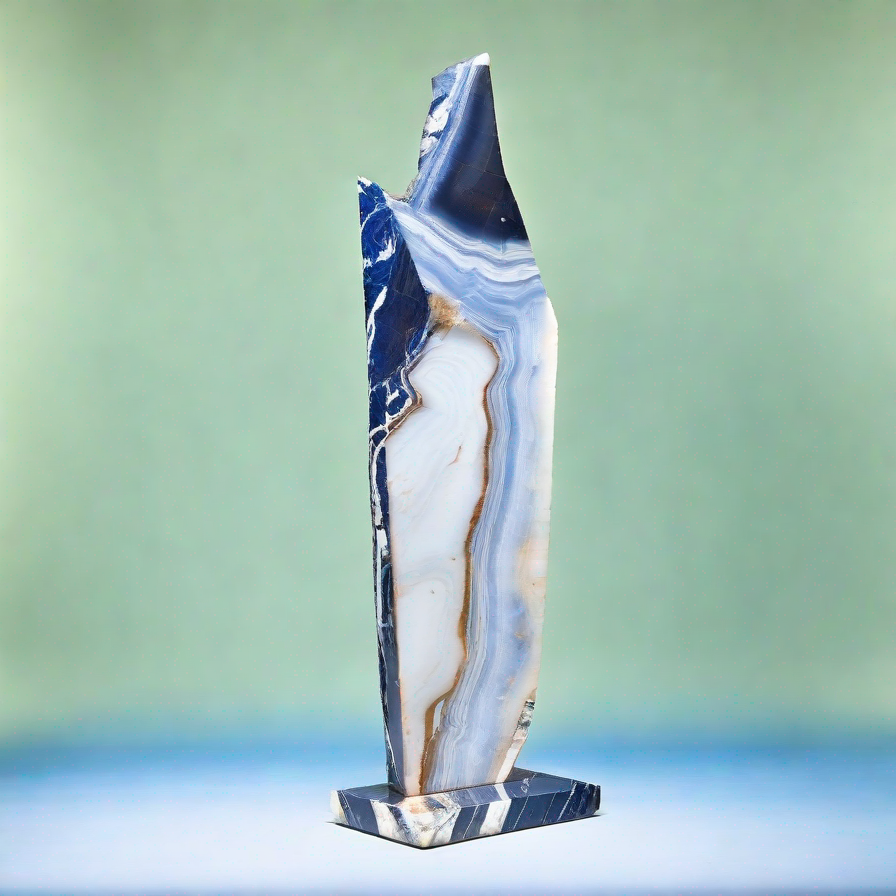

In [13]:
prompt=''
generate_sd(prompt)

In [15]:
#!pip install openai --upgrade
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install openai==0.28

# 2. APIキーを設定
import openai
import os

from config._api_key import openai_api
openai.api_key = openai_api
os.environ['OPENAI_API'] = openai_api

async def get_gpt4_response(prompt, model="gpt-4-0125-preview", tokens=1000):
    response = await openai.ChatCompletion.acreate(
        model=model,
        messages=[
            {"role": "system", "content": "You are a brilliant fashion design assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=tokens,
        temperature=0.7,
    )
    return response




DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
prompt='eureka'
await get_mary_response(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
await get_gpt4_response(prompt)

# 03.LOAD LOTUS

In [ ]:
from config.prompts import *

In [ ]:
import discord
import os
import openai
import asyncio
import re
from datetime import datetime
import shutil
from asyncio import sleep

from langdetect import detect as lang_detect

BG_EXT = ".gif"
BG_GIF_PATH = f'/root/Share/LOTUSROOM/GDrive/3dlogo_typ_bg{BG_EXT}'

#initial
intents = discord.Intents.default()
intents.message_content = True
client_gpt = discord.Client(intents=intents)
client_mary = discord.Client(intents=intents)
client_anagami = discord.Client(intents=intents)

token_mary = os.environ['TOKEN2']
token_gpt = os.environ['TOKEN1']
token_anagami = os.environ['TOKEN3']
openai.api_key = os.environ['OPENAI_API']

client_gpt_id = None
client_mary_id = None
client_anagami_id = None
user_who_typed_mary_id = None

dialogue_log = ""
question = ""
loop_value = 1

min_words_mary = 128
max_words_mary = 128+32

last_mary_message_time = None
question_list = []

from config._discord import *

async def check_last_message_time():
    global last_mary_message_time
    while True:
        if last_mary_message_time:
            time_since_last_message = datetime.now() - last_mary_message_time
            if time_since_last_message.total_seconds() >= 300:  # 300 seconds = 5 minutes
                channel = discord.utils.get(client_anagami.get_all_channels(), name='your-channel-name')
                if channel:
                    await channel.send("/mary 調子はどう？")
                last_mary_message_time = None  # Reset the timer
        await asyncio.sleep(60)  # Check every minute


async def move_old_images(destination_folder, log_folder, keep_files_count=5):
    """
    Move all files except the latest 'keep_files_count' from the destination folder to the log folder.
    """
    os.makedirs(log_folder, exist_ok=True)

    files = [f for f in os.listdir(destination_folder) if os.path.isfile(os.path.join(destination_folder, f))]
    files.sort(key=lambda x: os.path.getmtime(os.path.join(destination_folder, x)), reverse=True)  # sort files by modification time

    for file in files[keep_files_count:]:  # Skip the latest 'keep_files_count' files
        old_path = os.path.join(destination_folder, file)
        new_path = os.path.join(log_folder, file)
        shutil.move(old_path, new_path)

async def save_gif(destination_folder, filename):
    """
    Save a gif file to the destination folder and then move old images to the log folder.
    """
    destination_path = f"{destination_folder}/{filename}{BG_EXT}"
    #shutil.copy2(BG_GIF_PATH, destination_path)
    current_time = datetime.now().timestamp()
    os.utime(destination_path, (current_time, current_time))

    base_directory = os.path.dirname(os.path.dirname(destination_folder))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(destination_folder))
    await move_old_images(destination_folder, log_folder, keep_files_count=5)


def response_editor(response):
  if "。" in response:
      response = response.rsplit("。", 1)[0] + "。"
  elif "." in response:
      response = response.rsplit(".", 1)[0] + "."
  elif "\n" in response:
      response = response.rsplit("\n", 1)[0]
  return response

def extract_text(pattern, text):
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return ""

@client_mary.event
async def on_ready():
  global client_mary_id
  print(f'Welcome {client_mary.user}')
  client_mary_id = client_mary.user.id

async def on_reset(message, dialogue_log, question):
    dialogue_log = ""
    question = ""
    # channel = client_mary.get_channel(message.channel.id)
    # await channel.send("（reset dialogue）")
    # channel = client_gpt.get_channel(message.channel.id)
    # await channel.send("（reset dialogue）")
    return dialogue_log, question

@client_mary.event
async def on_message(message):
  global dialogue_log, loop_value, question, question_list, last_mary_message_time
  print(message.author.name)

  #print (state_machine.is_waiting_for_mary(), message.content)
  if message.content.startswith("/reset"):
    dialogue_log, question = await on_reset(message, dialogue_log, question)

  #if message.content.startswith("/mary"):
  #if str(message.channel.id) == specific_channel_id:
  if str(message.channel.id) == specific_channel_id and ((message.author.name in specific_user_names) or (message.author.id in specific_user_ids)):
    last_mary_message_time = datetime.now()
    user_who_typed_mary_id = message.author.id
    user_who_typed_mary_name = message.author.name
    loop_value = 1
    text = message.content.lstrip()
    dialogue_log += f'{user_who_typed_mary_name}: {text}\n'

    text_lang = lang_detect(text)
    await on_generate(text, message, text_lang)

    while loop_value >1:
      await on_generate(question, message, text_lang)
      loop_value -=1

    await sleep(180)

    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")

    #paths = [f"/content/drive/MyDrive/HATRA24SS/raspi/pi{str(i).zfill(2)}" for i in range(1, 9)]
    paths = [f"/root/Share/LOTUSROOM/GDrive/AX01/01/"]
    for path in paths:
        await save_gif(path, f"generated_image_{date_time}")

    dialogue_log, question = await on_reset(message, dialogue_log, question)

async def on_sd(prompt, str_idx):
    image = generate_sd(prompt)
    save_path = f'/root/Share/LOTUSROOM/GDrive/AX01/{str_idx}/'
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")
    file_path = f"{save_path}generated_image_{date_time}.png"
    image.save(f"{file_path}")
    base_directory = os.path.dirname(os.path.dirname(save_path))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(save_path))
    await move_old_images(save_path, log_folder)
    return file_path

@client_mary.event
async def on_generate(prompt, message, text_lang='ja'):
    lang_idx = 0 if text_lang == 'ja' else 1
    global dialogue_log, question, question_list
    channel = client_mary.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")
    mary_raw_response = await get_mary_response(prompt, min_words_mary, max_words_mary)
    mary_response = response_editor(mary_raw_response[len(prompt):])

    dialogue_log += f'Mary: {mary_response}\n'

    await thinking_msg.delete()  # Delete the thinking message instead of the user's message
    await message.channel.send(mary_response)

    await client_gpt.wait_until_ready()
    channel = client_gpt.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")

    text = f'{GPTPROMPT_A[lang_idx]}\n{dialogue_log}\n{ATTENTION_MSG[lang_idx]}\nMary:{mary_response}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    interpretation = extract_text(fr"{A_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    preview_interpolation = f"```{interpretation}```"
    try:
      await thinking_msg.delete()
    except discord.errors.NotFound:
      print("The message was already deleted or not found.")
    await channel.send(preview_interpolation)

    generating_msg = await channel.send(f"（generating...）")
    #thinking_msg = await channel.send(f"（thinking...）")
    text = f'{GPTPROMPT_B[lang_idx]}\n{interpretation}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    prompt_proposal = extract_text(fr"{B_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    # preview_prompt = f"```{prompt_proposal}```"
    # try:
    #   await thinking_msg.delete()
    # except discord.errors.NotFound:
    #   print("The message was already deleted or not found.")
    # await channel.send(preview_prompt)

    
    #file_path = await on_sd(prompt_proposal, '01')
    file_path = await on_sd(prompt_proposal, '01') #2023/11/14test
    print(file_path)
    with open(file_path, 'rb') as f:
        await channel.send(file=discord.File(f))
    try:
      await generating_msg.delete()
    except discord.errors.NotFound:
            print("The message was already deleted or not found.")


    dialogue_log += f'GPT4: {question}\n'

@client_gpt.event
async def on_ready():
  global client_gpt_id
  print(f'Welcome {client_gpt.user}')
  client_gpt_id = client_gpt.user.id

@client_anagami.event
async def on_ready():
  global client_anagami_id
  print(f'Welcome {client_anagami.user}')
  client_anagami_id = client_anagami.user.id

async def main():
    # Start the Discord clients
    client_tasks = asyncio.gather(
        client_mary.start(token_mary),
        client_gpt.start(token_gpt),
        client_anagami.start(token_anagami)
    )
    # Start the timer task
    timer_task = asyncio.create_task(check_last_message_time())
    # Wait for all tasks to complete
    await asyncio.gather(client_tasks, timer_task)


In [ ]:
await main()